# <center>Learning how to play Space Invaders with RL.</center>

![space invaders poster image](https://cdn-images-1.medium.com/max/1200/1*Ya6drllhmC82yh0J-elrPA.jpeg)

In [1]:
import gym
env = gym.make('SpaceInvaders-v0')

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [2]:
print(env.observation_space.shape)
print(env.action_space)

(210, 160, 3)
Discrete(6)


In [3]:
# Example of how env works
total_reward = 0
env.reset()
while True:
    env.render()
    next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
    total_reward += reward
    if done:
        print(total_reward)
        break
        
env.close()

90.0


## Training

In [5]:
from dqn.dqnAgent import DQNAgent
from dqn.model import Model
import numpy as np

agent = DQNAgent(env)
episodes = 1000
rewards = []

for e in range(1, episodes):
    # reset state at the beggining of each game
    state = env.reset()    
    state = Model.img_preprocessing(state)
    print(state.shape)
    total_reward = 0
    
    while(True):
        # env.render()
        
        action = agent.act(state)
        next_state, reward, done, info = env.step(action)
        next_state = Model.img_preprocessing(next_state)
        
        agent.memory.add(state, action, reward, next_state, done)
        
        state = next_state
        
        total_reward += reward
        
        if done:
            print("episode: {}, score: {}".format(e, total_reward))
            rewards.append(total_reward)
            break
      
    env.close()
    # train the agent with the experience of the episode
    agent.learn(32)
    

NameError: name 'next_state' is not defined

In [ ]:
from PIL import Image

# Debugging
next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
img = Image.fromarray(next_state)

area = (0, 20, 160 , 196)
img = img.crop(area)
img = img.resize((80,80)).convert('grey')
print(np.asarray(img).shape)

(1, 80, 80, 4)


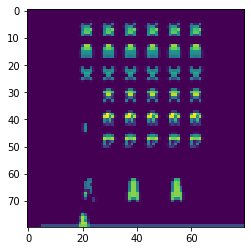

In [151]:
import skimage
from skimage.color import rgb2gray
from skimage.util import crop
import matplotlib.pyplot as plt


next_state, reward, done, info = env.step((env.action_space.sample())) # select random action

x_t = Image.fromarray(next_state)
area = (0, 20, 160 , 196)
x_t = np.asarray(x_t.crop(area))
x_t = skimage.color.rgb2gray(x_t)
x_t = skimage.transform.resize(x_t,(80,80))
x_t = skimage.exposure.rescale_intensity(x_t, out_range=(0, 255))
x_t = x_t/255.

s_t = np.stack((x_t, x_t, x_t, x_t), axis=2)
s_t = s_t.reshape(1, s_t.shape[0], s_t.shape[1], s_t.shape[2])

print(s_t.shape)


plt.imshow(x_t)